In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/BrainTumor.csv')
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [3]:
df.isnull().values.any()

False

In [4]:
df.dtypes

Image                  object
Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [5]:
df = df.drop('Image', axis=1)
df.head()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [6]:
df.dtypes

Class                   int64
Mean                  float64
Variance              float64
Standard Deviation    float64
Entropy               float64
Skewness              float64
Kurtosis              float64
Contrast              float64
Energy                float64
ASM                   float64
Homogeneity           float64
Dissimilarity         float64
Correlation           float64
Coarseness            float64
dtype: object

In [7]:
df.shape

(3762, 14)

## 20% test and 80% train

In [8]:
from sklearn.model_selection import train_test_split

x=df.drop('Class', axis=1)
y=df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=500)

In [9]:
print(np.around(len(x_train)/len(df)*100, 2), '% data is in training set')
print(np.around(len(x_test)/len(df)*100, 2), '% data is in testing set')

79.98 % data is in training set
20.02 % data is in testing set


In [10]:
x_train.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2955,8.885757,524.787414,22.908239,0.126246,3.003324,9.371247,110.767107,0.316974,0.100473,0.548388,4.491074,0.957452,7.458341e-155
3407,23.896805,1327.413300,36.433684,0.017464,2.175886,5.269743,80.197293,0.112458,0.012647,0.464989,3.989520,0.969694,7.458341e-155
1472,7.712921,1365.986172,36.959250,0.007651,5.257812,28.392228,174.877778,0.073192,0.005357,0.364426,6.794444,0.974720,7.458341e-155
1385,8.688858,265.976473,16.308785,0.107205,2.364759,6.063188,40.278998,0.290178,0.084203,0.589232,2.657519,0.957107,7.458341e-155
337,5.644806,482.075191,21.956211,0.096367,4.253737,18.523745,224.376304,0.274540,0.075372,0.505259,6.024050,0.944281,7.458341e-155


In [11]:
x_train.shape

(3009, 13)

In [12]:
x_test.shape

(753, 13)

In [13]:
x_test.head()

,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
2978,2.754333,156.838600,12.523522,0.178603,5.111631,27.245357,142.883713,0.382138,0.146030,0.568628,4.928494,0.926003,7.458341e-155
3713,3.902008,275.244129,16.590483,0.137015,4.863508,24.905657,192.791289,0.331465,0.109869,0.491592,6.503136,0.935306,7.458341e-155
2767,12.293625,599.045990,24.475416,0.110147,2.540186,7.211540,81.764952,0.294917,0.086976,0.516582,3.834437,0.963229,7.458341e-155
3524,10.151825,744.840266,27.291762,0.170613,3.131541,10.232904,98.883916,0.372758,0.138948,0.603959,3.441181,0.976071,7.458341e-155
2250,8.767212,391.524301,19.786973,0.003571,3.169742,11.540723,60.535565,0.049847,0.002485,0.390506,4.156261,0.945162,7.458341e-155


In [14]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [15]:
y_pred_train=model.predict(x_train)

In [16]:
y_pred_test=model.predict(x_test)

In [17]:
from sklearn import metrics

print('Model Accuracy:',
      np.around(metrics.accuracy_score(y_test, y_pred_test)*100, 2), '%')

Model Accuracy: 96.95 %


In [18]:
print('Model Accuracy:',
      np.around(metrics.accuracy_score(y_train, y_pred_train)*100, 2), '%')

Model Accuracy: 96.64 %


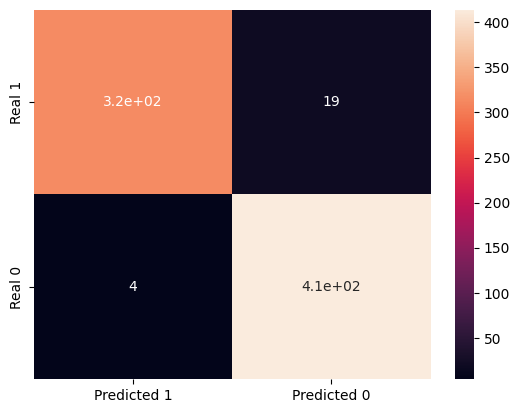

In [19]:
confusion=metrics.confusion_matrix(y_test, y_pred_test, labels=[1, 0])

confusion_df = pd.DataFrame(confusion, 
                            index=['Real 1', 'Real 0'],
                            columns=['Predicted 1', 'Predicted 0']
                           )

sns.heatmap(confusion_df, annot=True)
plt.show()

In [20]:
evaluation = metrics.classification_report(y_test,
                                           y_pred_test,
                                           labels=[1, 0])

print(evaluation) 

              precision    recall  f1-score   support

           1       0.99      0.94      0.96       335
           0       0.96      0.99      0.97       418

    accuracy                           0.97       753
   macro avg       0.97      0.97      0.97       753
weighted avg       0.97      0.97      0.97       753



## 30% test and 70% train

In [21]:
from sklearn.model_selection import train_test_split

x=df.drop('Class', axis=1)
y=df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=500)

In [22]:
x_test.shape

(1129, 13)

In [23]:
x_train.shape

(2633, 13)

In [24]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [25]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [26]:
from sklearn import metrics

print('Model Accuracy:',
      np.around(metrics.accuracy_score(y_test, y_pred_test)*100, 2), '%')

Model Accuracy: 97.34 %


In [27]:
print('Model Accuracy:',
      np.around(metrics.accuracy_score(y_train, y_pred_train)*100, 2), '%')

Model Accuracy: 96.73 %


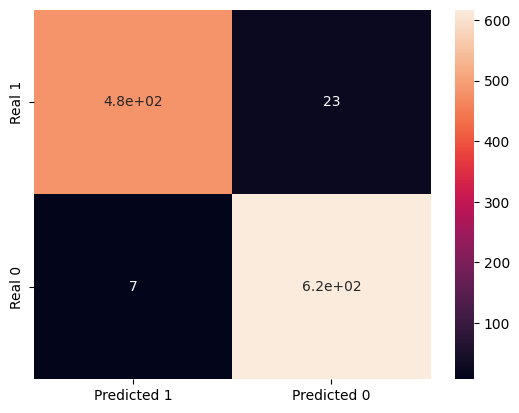

In [28]:
confusion=metrics.confusion_matrix(y_test, y_pred_test, labels=[1, 0])

confusion_df = pd.DataFrame(confusion, 
                            index=['Real 1', 'Real 0'],
                            columns=['Predicted 1', 'Predicted 0']
                           )

sns.heatmap(confusion_df, annot=True)
plt.show()

In [29]:
evaluation = metrics.classification_report(y_test,
                                           y_pred_test,
                                           labels=[1, 0])

print(evaluation)

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       505
           0       0.96      0.99      0.98       624

    accuracy                           0.97      1129
   macro avg       0.97      0.97      0.97      1129
weighted avg       0.97      0.97      0.97      1129

